# Mini-batch Stochastic Gradient Descent

## **Step1**
* Generate dataset
* Dividing training and testing sets

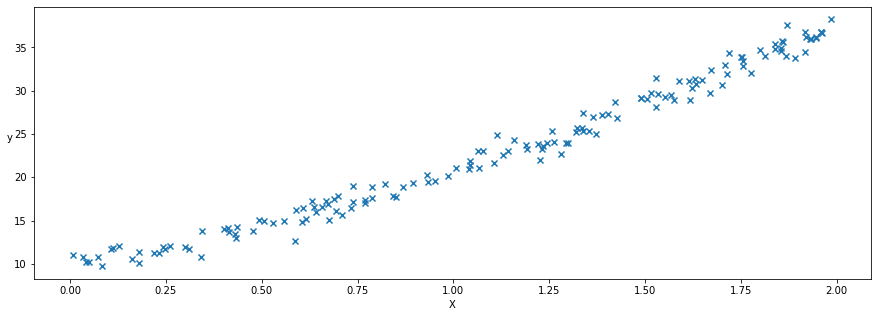

In [254]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.model_selection import train_test_split
X = 2 * np.random.rand(150, 1)
y = 10 + 8*X + 3 * X*X + np.random.randn(150, 1)
train_X, test_X,train_y, test_y = train_test_split(X,y,train_size=0.7) #Dividing training and testing sets(7:3)
figure=plt.figure(figsize=(15,5))
plt.scatter(X, y, marker='x')
plt.xlabel('X')
plt.ylabel('y', rotation=0)
plt.show()

## **Step2**
* Defining the cost function

In [255]:
def cal_cost(theta, X, y):
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1/(2 * m)) * np.sum(np.square(predictions - y))
    
    return cost

## **Step3**
* Defining the mini-batch SGD

In [256]:
def mini_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1, batch_size=16):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 3)) #Fit according to the quadratic function, the model capacity is 3
    
    for i in range(iterations):
        cost_per_iteration = .0
        rand_indicies = np.random.permutation(m)
        
        X = X[rand_indicies]
        y = y[rand_indicies]        
        
        for j in range(0, m, batch_size):
            X_inner = X[j: j+batch_size]
            y_inner = y[j: j+batch_size]
            
            predictions = np.dot(X_inner, theta)
            
            theta = theta - (1/m) * learning_rate * (X_inner.T.dot((predictions - y_inner))) #Update theta
            theta_history[i]=theta.T
            cost_per_iteration = cal_cost(theta, X_inner, y_inner)
        #print(theta)
        #print(theta_history)
        cost_history[i] = cost_per_iteration
        #print(cost_history)
    return theta, cost_history, theta_history

## **Step4**
* Model training on the training set

Theta0:   10.424
Theta1:   6.350
Theta2:   3.799
Cost/MSE: 0.077


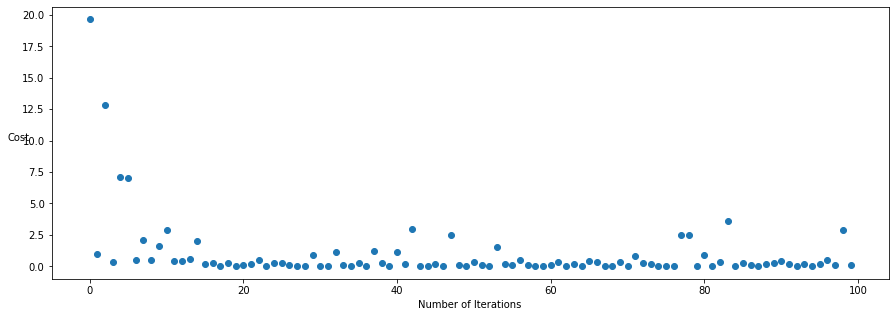

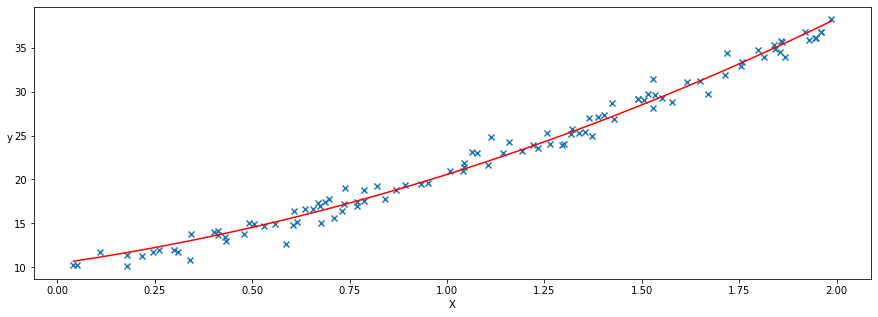

In [265]:
lr = 0.3
n_iter = 100
batch_size = 4

theta = np.random.randn(3,1)

X_b = np.c_[np.ones((len(train_X),1)),train_X,train_X*train_X]
theta,cost_history,theta_history = mini_gradient_descent(X_b, train_y, theta, lr, n_iter, batch_size=1)
print('{:<10}{:.3f}'.format('Theta0:', theta[0][0]))
print('{:<10}{:.3f}'.format('Theta1:', theta[1][0]))
print('{:<10}{:.3f}'.format('Theta2:', theta[2][0]))
print('{:<10}{:.3f}'.format('Cost/MSE:', cost_history[-1]))
plt.figure(figsize=(15, 5))
plt.scatter(range(n_iter), cost_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost', rotation=0)
plt.figure(figsize=(15, 5))
plt.scatter(train_X, train_y, marker='x')
y_pred = np.dot(X_b, theta)
X_s = np.sort(train_X, axis=0)
Y_s = np.sort(y_pred, axis=0)
plt.plot(X_s, Y_s, 'red')
plt.xlabel('X')
plt.ylabel('y', rotation=0)
plt.show()

## **Step5**
* Model testing on the testing set

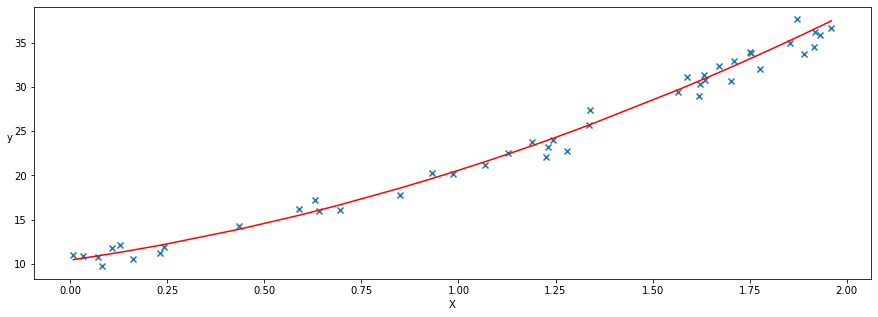

MSE/Test:  [0.1711796]


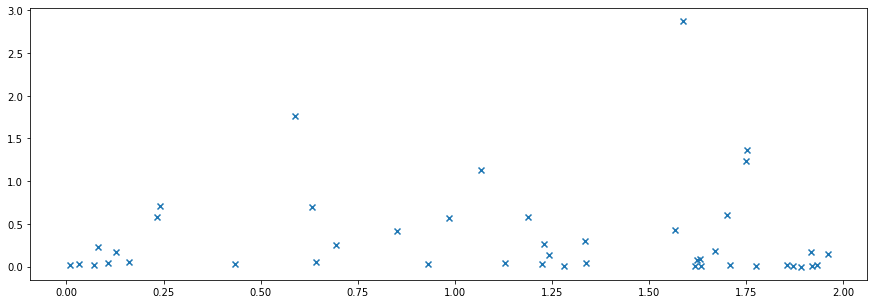

In [266]:
#print(theta_history)
plt.figure(figsize=(15, 5))
plt.scatter(test_X, test_y, marker='x')
test_error = np.zeros(len(test_X))
#for i in range(n_iter):
X_c = np.c_[np.ones((len(test_X),1)),test_X,test_X*test_X]
    #y_pred = np.dot(X_c, theta_history[i].T)
#print(theta)
y_pred = np.dot(X_c, theta)
X_v = np.sort(test_X, axis=0)
Y_v = np.sort(y_pred, axis=0)
y_ture=np.sort(test_y,axis=0)
#print(Y_v)
#print(y_ture)
#test_error=test_y-Y_v
plt.xlabel('X')
plt.ylabel('y', rotation=0)
plt.plot(X_v, Y_v, 'red')
plt.show()
#cost = (1/(2 * m)) * np.sum(np.square(predictions - y))
plt.figure(figsize=(15, 5))
l=len(test_X)
test_error = np.zeros(len(test_X))
test_error = y_ture-Y_v
#print(test_error)
sum=.0
for i in range(l):
    sum+=(np.square(test_error[i]))
print("MSE/Test: ",(1/(2*l))*sum)

plt.scatter(test_X,np.square(test_error),marker='x')
plt.show()